---------------
---------------
# Project: Airline Data Challenge - Capital One Data Analyst Test
### by **Sossou Simplice Adjisse**
---------------
---------------

## Context:
- The airline company is looking to enter the US domestic market and wants recommendations based on the three datasets provided to make some business decisions. 
- I am given datasets of the flights, tickets, and airport codes. Later in the code, I will give more details on the variables in these different datasets. I am also provided information on costs and revenue. 

## Questions:

1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you choose.
4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

## How I will approach the datasets
- First, I will load the datasets as flights, tickets, and airport codes. 
    - I will make their copies as flights_clean, tickets_clean, and airport_codes_clean before making modifications. 
- Second, I will perform some data quality checks. On each one of the flights, tickets, and airport codes:
    - I will check things like mixed types, missing, outliers, and duplicates. 
- Third, I will clean the datasets. 
    - I will delete the duplicates when I see fit 
    - fix the mixed types by converting the variables to the appropriate format. 
    - I will replace missing with mean or median depending on the situation
- Next, I will put restrictions on the datasets as per the requirements of the analysis 
    - I will filter only the medium and large airports and keep only the US flights. 
    - I will filter only the airports within the US as we are dealing with the US domestic market.
- Lastly, I will create additional columns to respond to the questions.

##  How I will approach the coding:
- To ensure reusability and scalability, I will create independent functions for specific tasks
- I will organize all the codes in a file called 'utils' for utilities and put it in a folder called 'Modules
- I will include a relative path to the package to import them into my main Python notebook
- For anybody who wants to run my notebook;
    - make sure to change the path in 'sys.path.append()'
    - Open the utils file and change the path in the function 'load_csv()'
 - At the end, I will render the code and submit the following:
     - my python notebook
     - the Modules folder which contains the utils files
     - an excel file which contains the new variables
     - a MEADME.md file

<br>
<br>
<br>

## Data Quality Checks
<!-- * **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** A function which scores likelihood of diabetes based on family history.
* **Age:** Age in years
* **Outcome:** Class variable (0: person is not diabetic or 1: person is diabetic) -->

In [1]:
# The line below upgrades my numexpr in python.
# !pip install --upgrade numexpr
# !pip install plotly


In [2]:
# Importing some necessary libraries:
import plotly.express as px

# html export
import plotly.io as pio
pio.renderers.default ='notebook'

# PDF export
# !pip install Pyppeteer
# !pyppeteer-install

# For data manipulation:
import pandas as pd
import numpy as np

# For plotting:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Path to modules and codes
import sys 
sys.path.append("/Users/sossousimpliceadjisse/Library/CloudStorage/OneDrive-UW-Madison/Dissertation/Chapter I/z_JM_Files/Sossou_PDA_CapitalOne/Sossou_DC_CapitalOne/Codes")

# Modules as packages
from Modules.utils import load_csv
from Modules.utils import display_mixed_and_missing
from Modules.utils import detect_missing_values
from Modules.utils import display_middle_rows
from Modules.utils import transform_date_format
from Modules.utils import plot_multiple_columns_boxplot
from Modules.utils import impute_missing_with_median
from Modules.utils import plot_pie_chart
from Modules.utils import plot_bar_chart_with_percentages
from Modules.utils import split_coordinates
from Modules.utils import aggregate_data
from Modules.utils import create_route_id
from Modules.utils import merge_flights_tickets_airportcodes
from Modules.utils import calculate_delay_to_pay
from Modules.utils import calculate_total_DELAY_toPAY
from Modules.utils import create_dummies
from Modules.utils import profit
from Modules.utils import plot_top_routes
from Modules.utils import add_delay_columns
from Modules.utils import plot_top_least_delayed_routes

# '''
# Notes: 
# 1-) I could import all the functions above with: " from Modules.utils import  * "
# 2-) I decided to export one by one as I did above to make it easy for the reader 
#     the list of the functions in the utils file with opening the util file
# '''

### Flights dataset
I will:
-  display the first rows to examine what the dataset looks like
-  examine the data format of the columns 
-  examine the number of duplicates with respect to all columns and drop them
-  explore the missing and perform the right emputation

In [3]:
# Loading the Flights dataset
flights = load_csv("Flights.csv")

# Making a copy that I will use for the modifications
flights_clean = flights.copy()

In [4]:
# Investigating the columns and their types
flights_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [5]:
# Exploring the top 5 rows
flights_clean.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [6]:
# Display the middle 5 rows 
display_middle_rows(flights_clean, 5)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
957941,2019-02-13,OO,N779CA,4121,10397,ATL,"Atlanta, GA",15323,TRI,"Bristol/Johnson City/Kingsport, TN",32.0,20.0,0.0,40.0,227.0,0.86
957942,2019-02-13,OO,N779CA,4121,15323,TRI,"Bristol/Johnson City/Kingsport, TN",10397,ATL,"Atlanta, GA",20.0,3.0,0.0,42.0,227.0,0.74
957943,2019-02-13,OO,N286SY,4122,10721,BOS,"Boston, MA",14122,PIT,"Pittsburgh, PA",164.0,155.0,0.0,85.0,496.0,0.92
957944,2019-02-13,OO,N830SK,4123,12264,IAD,"Washington, DC",11433,DTW,"Detroit, MI",0.0,-5.0,0.0,73.0,383.0,0.69
957945,2019-02-13,OO,N771SK,4124,10397,ATL,"Atlanta, GA",10781,BTR,"Baton Rouge, LA",47.0,30.0,0.0,65.0,448.0,0.59


In [7]:
# Display the last 5 rows 
flights_clean.tail()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344
1915885,3/27/19,AA,N945AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,5.0,0.0,117,****,0.350192


#### Remarks: 
After observing the top 5, middle 5, and last 5 rows in the data, I notice the followings:
- The column FL_DATE which is date has at least two formats, YYYY-MM-DD and M/DD/YY, and needs further investigations
    - I will use the format YYYY-MM-DD, which is ISO 8601 format and has more advantages 
- AIR_TIME and DISTANCE are object, which is a wrong format. I will need to ocnvert them into float64
    - I will convert these two colomns to float64
- Nothing else jumps of the ordinary for now

In [8]:
# Further investigation of the column FL_DATE
flights_clean["FL_DATE"].unique()

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-02-01',
       '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

#### Remarks: 
-  FL_DATE has two different formats: YYYY-MM-DD and M/DD/YY
-  I will convert it to YYYY-MM-DD format

In [9]:
# Converting FL_DATE to YYYY-MM-DD format
flights_clean["FL_DATE"] = flights_clean["FL_DATE"].apply(transform_date_format)

In [10]:
flights_clean["FL_DATE"].unique()

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-02-01',
       '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [11]:
# Converting AIR_TIME and DISTANCE to the right format
column_data_types = {
    'AIR_TIME': float,
    'DISTANCE': float
}

for column, dtype in column_data_types.items():
    flights_clean[column] = pd.to_numeric(flights_clean[column], errors='coerce')

In [12]:
flights_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           float64
 14  DISTANCE           float64
 15  OCCUPANCY_RATE     float64
dtypes: float64(6), int64(2), object(8)
memory usage: 233.9+ MB


In [13]:
# Examining duplicates with respect to all the columns 
flights_clean.duplicated().sum()

4545

#### Remarks: 
-  There are 4545 duplicates with respect to all the columns in the flights data.
-  Given the context here,it does not mean sense to have the same data row multiple times 
-  Therefore I decide to drop them next

In [14]:
# Dropping the 4545 dupliactes with repect to all the columns 
flights_clean = flights_clean.drop_duplicates()

In [15]:
flights_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1911341 entries, 0 to 1911340
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           float64
 14  DISTANCE           float64
 15  OCCUPANCY_RATE     float64
dtypes: float64(6), int64(2), object(8)
memory usage: 247.9+ MB


In [16]:
# Exploring the percentage of missing in every columns
detect_missing_values(flights_clean)

Missing Values Information:
               Column  Missing Values  Percentage
0             FL_DATE               0        0.00
1          OP_CARRIER               0        0.00
2            TAIL_NUM           12111        0.63
3   OP_CARRIER_FL_NUM               0        0.00
4   ORIGIN_AIRPORT_ID               0        0.00
5              ORIGIN               0        0.00
6    ORIGIN_CITY_NAME               0        0.00
7     DEST_AIRPORT_ID               0        0.00
8         DESTINATION               0        0.00
9      DEST_CITY_NAME               0        0.00
10          DEP_DELAY           50216        2.63
11          ARR_DELAY           55847        2.92
12          CANCELLED               0        0.00
13           AIR_TIME           56094        2.93
14           DISTANCE             274        0.01
15     OCCUPANCY_RATE              31        0.00


#### Remarks: 
- TAIL_NUM has 12111 missing.
    - I will drop them because, first, it is a string variable, and second, the percentage of missing is 0.63%, which is very small.
-  DEP_DELAY, ARR_DELAY, AIR_TIME, DISTANCE, and OCCUPANCY_RATE have 50216 (2.63%), 55847(2.92%), 56094(2.93%), 274(0.01%), and 31 respectively.   
    - I will replace the missings in these variables. But first, I will inspect the these variables for ouliers before deciding the appropriate imputation method between mean or median. For example, replacing the missings with the median value is appropriate when there are outliers because the median is less sensitive to the outliers than the mean.

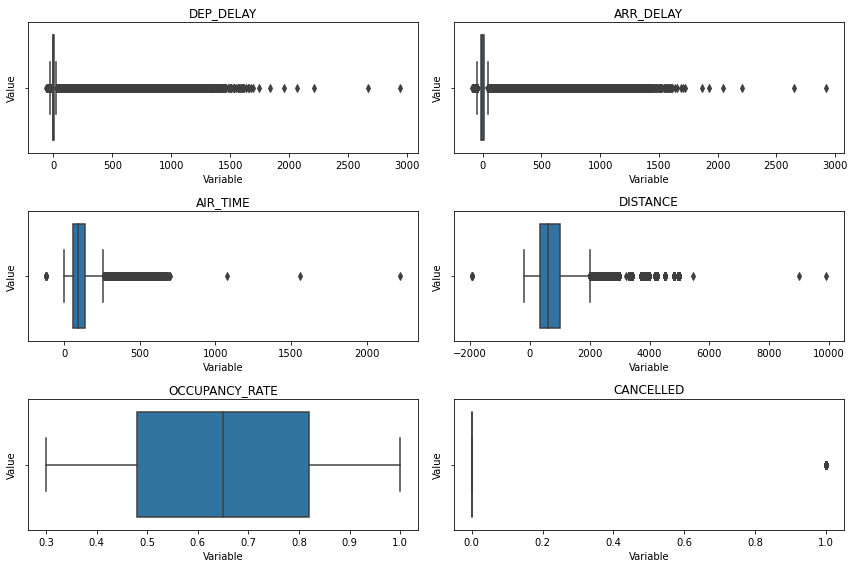

In [17]:
# Visual inspection of outliers in the numerical columns using box plots
columns_to_plot = ['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE', 'CANCELLED']
plot_multiple_columns_boxplot(flights_clean, columns_to_plot)

#### Remarks: 
-  The columns OCCUPANCY_RATE, CANCELLED look fine 
-  The columns DEP_DELAY, ARR_DELAY, AIR_TIME, and DISTANCE have outliers 
-  Next, I will replace the missing values in these columns with the median

In [18]:
# flights_clean.info()

In [19]:
# Imputing missing values in columns with the median
columns_to_impute = ['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE']
impute_missing_with_median(flights_clean, columns_to_impute)

In [20]:
# flights_clean.info()

In [21]:
# Dropping out the rows where TAIL_NUM is missing
flights_clean.dropna(subset=['TAIL_NUM'], inplace=True)
# Resetting the index
flights_clean.reset_index(drop=True, inplace=True)

In [22]:
# flights_clean.info()

In [23]:
# Exploring the percentage of missing in every columns
# detect_missing_values(flights_clean)

In [24]:
# Count the rows where 'CANCELLED' is equal to 1
cancelled_count = len(flights_clean[flights_clean['CANCELLED'] == 1])

# Print or use the count as needed
print(f"Number of rows where CANCELLED = 1: {cancelled_count}")

Number of rows where CANCELLED = 1: 39368


#### Remarks: 
-  There are 39368 cancelled flights and will drop them as per the requirement of the analysis.

In [25]:
# Drop rows where 'CANCELLED' is equal to 1 in place
flights_clean.drop(flights_clean[flights_clean['CANCELLED'] == 1].index, inplace=True)
# Resetting the index
flights_clean.reset_index(drop=True, inplace=True)

In [26]:
# flights_clean.info()

<br>



### Tickets dataset
I will:
-  display the first rows to examine what the dataset looks like
-  examine the data format of the columns 
-  examine the number of duplicates with respect to all columns and drop them
-  explore the missing and perform the right emputation

In [27]:
# Tickets dataset
tickets = load_csv('Tickets.csv')
tickets_clean = tickets.copy()

In [28]:
tickets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [29]:
tickets_clean.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


In [30]:
# Display the middle 5 rows 
display_middle_rows(tickets_clean, 5)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
583640,201914628838,2019,1,MCI,US,MO,Missouri,1.0,WN,1.0,618.0,CMH
583641,201914635868,2019,1,MCI,US,MO,Missouri,1.0,WN,1.0,682.0,CLT
583642,201914628853,2019,1,MCI,US,MO,Missouri,1.0,WN,1.0,11.0,DCA
583643,201915200756,2019,1,MCI,US,MO,Missouri,1.0,YX,1.0,478.0,ORD
583644,20191612845,2019,1,MCI,US,MO,Missouri,0.0,AA,1.0,398.0,DFW


In [31]:
# Investigating the tail rows 
tickets_clean.tail()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
1167280,201911284909,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,244.0,ANC
1167281,201911284959,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,371.0,JNU
1167282,201911284940,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,271.0,JNU
1167283,201911284914,2019,1,YAK,US,AK,Alaska,0.0,AS,1.0,603.0,ANC
1167284,201911284952,2019,1,YAK,US,AK,Alaska,1.0,AS,1.0,299.0,JNU


#### Remarks: 
After observing the top 5, middle 5, and last 5 rows in the tickets dataset, I notice the followings:
- ITIN_FARE is a string, which is a wrong format
    - I will convert this column to float64
- Everything else looks fine for now.

In [32]:
# Converting ITIN_FARE to the right format
column_data_types = {
    'ITIN_FARE': float
}

for column, dtype in column_data_types.items():
    tickets_clean[column] = pd.to_numeric(tickets_clean[column], errors='coerce')

In [33]:
# tickets_clean.info()

In [34]:
# Examining dupliactes with repect to all the columns 
tickets_clean.duplicated().sum()

71898

#### Remarks: 
-  There are 71898 duplicates with respect to all the columns in the tickets data.
-  Given our context here, having the same data row multiple times does not mean sense
-  Therefore I decide to drop them next

In [35]:
# Dropping the 71898 duplicates with respect to all the columns 
tickets_clean = tickets_clean.drop_duplicates()

In [36]:
# Exploring the percentage of missing in every columns
detect_missing_values(tickets_clean)

Missing Values Information:
               Column  Missing Values  Percentage
0             ITIN_ID               0        0.00
1                YEAR               0        0.00
2             QUARTER               0        0.00
3              ORIGIN               0        0.00
4      ORIGIN_COUNTRY               0        0.00
5    ORIGIN_STATE_ABR               0        0.00
6     ORIGIN_STATE_NM               0        0.00
7           ROUNDTRIP               0        0.00
8   REPORTING_CARRIER               0        0.00
9          PASSENGERS            1575        0.14
10          ITIN_FARE            3804        0.35
11        DESTINATION               0        0.00


#### Remarks: 
-  The columns PASSENGERS and ITIN_FARE have 1575(0.14%) and 3804(0.35%) missing values repectively
-  Next, I will examine the outliers in them and decide which method t use between mean and median to replace them.

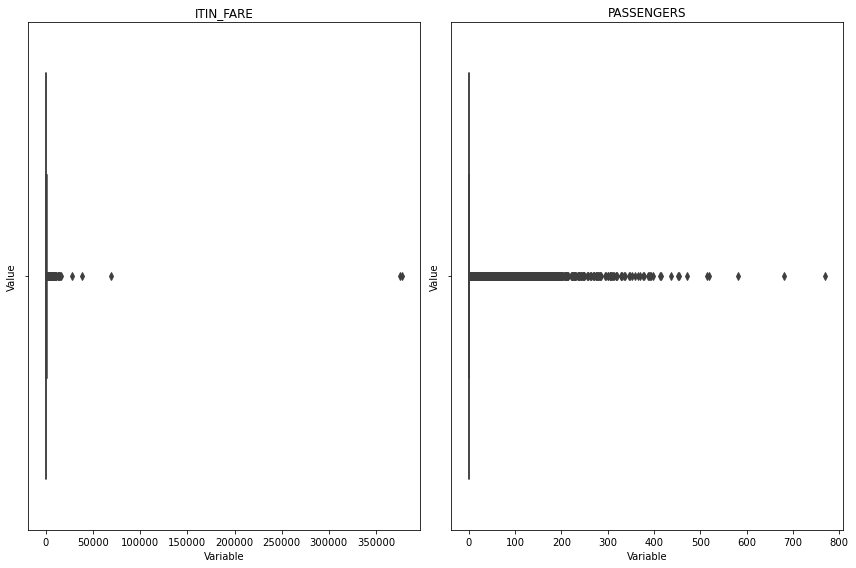

In [37]:
# Visual inspection of outliers in the numerical columns using box plots
columns_to_plot = ['ITIN_FARE', 'PASSENGERS']
plot_multiple_columns_boxplot(tickets_clean, columns_to_plot)

#### Remarks: 
-  As suspected, columns PASSENGERS and ITIN_FARE have outliers
-  Therefore I will replace them with the median method
-  Next, I will restrict the data to only round trips. This means I will drop rows where ROUNDTRIP == 0

In [38]:
# Imputing missing values in columns with the median
columns_to_impute = ['PASSENGERS', 'ITIN_FARE']
impute_missing_with_median(tickets_clean, columns_to_impute)

In [39]:
tickets_clean["ROUNDTRIP"].value_counts()

ROUNDTRIP
1.0    661036
0.0    434351
Name: count, dtype: int64

In [40]:
# Keeping only the round trips 
tickets_clean.drop(tickets_clean[tickets_clean['ROUNDTRIP'] == 0].index, inplace=True)
# Resetting the index
tickets_clean.reset_index(drop=True, inplace=True)

In [41]:
# tickets_clean["ROUNDTRIP"].value_counts()

In [42]:
# I will break the ITIN_ID column to explore if there is possibility to extract some information
# Convert 'ITIN_ID' column to string type
tickets_clean['ITIN_ID'] = tickets_clean['ITIN_ID'].astype(str)

# Extract the first 5 digits and create new columns
tickets_clean['ITIN_ID1'] = tickets_clean['ITIN_ID'].str[:5]
tickets_clean['ITIN_ID2'] = tickets_clean['ITIN_ID'].str[5:]

# Move the new columns to the second and third positions
tickets_clean.insert(1, 'ITIN_ID1', tickets_clean.pop('ITIN_ID1'))
tickets_clean.insert(2, 'ITIN_ID2', tickets_clean.pop('ITIN_ID2'))

<br>
<br>
<br>
<br>
<br>

### Airport Codes dataset
I will:
-  display the first rows to examine what the dataset looks like
-  examine the data format of the columns 
-  examine the number of duplicates with respect to all columns and drop them
-  explore the missing and perform the right emputation

In [43]:
# Airport Codes dataset
airport_codes = load_csv('Airport_Codes.csv')
airport_codes_clean = airport_codes.copy()

In [44]:
airport_codes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [45]:
# Investigating the top 5 rows
airport_codes_clean.head(3)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"


In [46]:
# Investigating the middle 5 rows 
display_middle_rows(airport_codes_clean, 5)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
27682,small_airport,Hilton Head Airport,19.0,NaN,US,Hilton Head Island,HHH,"-80.6975021362, 32.2243995667"
27683,small_airport,Hartford Municipal Airport,1069.0,NaN,US,Hartford,NaN,"-88.39109802, 43.34930038"
27684,medium_airport,Barnstable Municipal Boardman Polando Field,54.0,NaN,US,Hyannis,HYA,"-70.28040314, 41.66930008"
27685,medium_airport,San Marcos Regional Airport,597.0,NaN,US,San Marcos,NaN,"-97.862999, 29.8927"
27686,medium_airport,Sawyer County Airport,1216.0,NaN,US,Hayward,HYR,"-91.44429779050002, 46.025199890100005"


In [47]:
# Investigation the 5 last rows
airport_codes_clean.tail()

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
55364,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,Yingkou,YKH,"122.3586, 40.542524"
55365,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,Shenyang,NaN,"123.49600219726562, 41.784400939941406"
55366,heliport,Sealand Helipad,40.0,EU,GB,Sealand,NaN,"1.4825, 51.894444"
55367,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,Grande Glorieuse,NaN,"47.296388888900005, -11.584277777799999"
55368,small_airport,Satsuma IÅjima Airport,338.0,AS,JP,Mishima-Mura,NaN,"130.270556, 30.784722"


#### Remarks: 
-  After observing the top 5, middle 5, and last 5 rows in the airpo data, I notice nothing that jumps out of the ordinary.
-  Next, I will explore duplicates, restrict the data to only the US and missings

In [48]:
# Examining duplicates with respect to all the columns 
airport_codes_clean.duplicated().sum()

101

#### Remarks: 
-  There are 101 dupliactes with respect to all the colomns. Here are the next steps I will be taking:
1. I will drop the duplicates as I did for the flights and tickets datasets
2. I will restrict the data to only the airports within the US using their IATA codes
3. I will filter only the large and medium airports
4. I will explore missings
5. If there is missing in the IATA_CODE colmun I will drop them
- These steps will allow me to keep only the valid medium and large airports within the US

In [49]:
# Dropping the 101 duplicates with respect to all the columns 
airport_codes_clean = airport_codes_clean.drop_duplicates()

In [50]:
# Keep only rows where ISO_COUNTRY is equal to 'US'
airport_codes_clean = airport_codes_clean[airport_codes_clean['ISO_COUNTRY'] == 'US']
# Reset the index in place
airport_codes_clean.reset_index(drop=True, inplace=True)

In [51]:
# Filter rows where TYPE is 'medium_airport' or 'large_airport'
airport_codes_clean = airport_codes_clean[airport_codes_clean['TYPE'].isin(['medium_airport', 'large_airport'])]

In [52]:
# Exploring the percentage of missing in every columns
detect_missing_values(airport_codes_clean)

Missing Values Information:
         Column  Missing Values  Percentage
0          TYPE               0        0.00
1          NAME               0        0.00
2  ELEVATION_FT               3        0.35
3     CONTINENT             858      100.00
4   ISO_COUNTRY               0        0.00
5  MUNICIPALITY               3        0.35
6     IATA_CODE              37        4.31
7   COORDINATES               0        0.00


#### Remarks: 
- There are still 37 missings in the IATA_CODE and I will drop them
- This will help me for a quality merging later with the flights and tickets

In [53]:
# Drop rows where 'IATA_CODE' is missing
airport_codes_clean.dropna(subset=['IATA_CODE'], inplace=True)
# Resetting the index
airport_codes_clean.reset_index(drop=True, inplace=True)

In [54]:
# Exploring the percentage of missing in every columns
detect_missing_values(airport_codes_clean)

Missing Values Information:
         Column  Missing Values  Percentage
0          TYPE               0         0.0
1          NAME               0         0.0
2  ELEVATION_FT               0         0.0
3     CONTINENT             821       100.0
4   ISO_COUNTRY               0         0.0
5  MUNICIPALITY               0         0.0
6     IATA_CODE               0         0.0
7   COORDINATES               0         0.0


#### Remarks:
- CONTINENT is missing everywhere. I could drop it, but it does not bother to keep it for now.

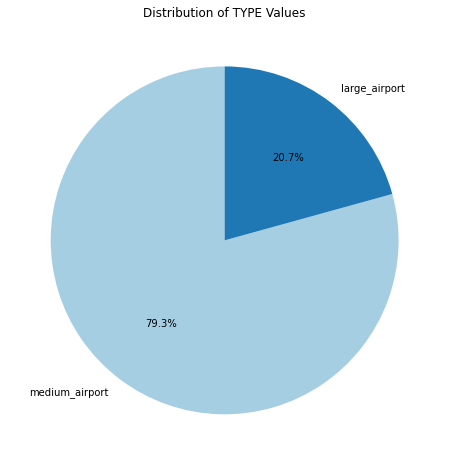

In [55]:
# Plotting the pie chart TYPE to visualize the relative percentages of larger and medium airports
plot_pie_chart(airport_codes_clean, 'TYPE')

In [56]:
# I can also plot the bar graph of the TYPE
# plot_bar_chart_with_percentages(airport_codes_clean, 'TYPE')


In [57]:
# Splitting the COORDINATES columns into longitude and latitude
# This would be very helpful if we needed to plot the airports on a map
airport_codes_clean = split_coordinates(airport_codes_clean, 'COORDINATES')

#### Remarks: 
- After all the above cleaning, the medium airports represent 79.3% in our clean airpot codes data
- Next, it is time now to merge the flights, ticket and airport codes datasets 

<br>
<br>
<br>
<br>
<br>

### Recapitulation on previous cleaning and restrictions: 
**Flights dataset:**
1. Converted FL_DATE to YYYY-MM-DD format 
2. Converted  AIR_TIME and DISTANCE from objects format to float64 format
3. Dropped the 4545 duplicates with respect to all the columns 
4. Replaced missing values in columns with the median (because of outliers) in columns 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', and ‘OCCUPANCY_RATE'
5. Dropped out 12111  rows where TAIL_NUM is missing
6. Dropped out 39368 rows where the ‘flight is cancelled (CANCELLED' == 1)
    - Final data: flights_clean

**Tickets dataset:**
1. Converted ITIN_FARE from string to float64 format
2. Dropped out  71898 duplicates with respect to all the columns 
3. Imputed missing values in columns 'PASSENGERS', and ‘ITIN_FARE' with the median because of outliers
4. Kept only the 661036 rows of round tickets, dropping out 434351 rows where the column ROUNDTRIP == 0
    - Final data: tickets_clean

**Airports Codes dataset:**
1. Dropped the 101 duplicates with respect to all the columns
2. Kept only the US airport IATA CODES, meaning keeping rows where ISO_COUNTRY is equal to 'US’.  This ensures we are only dealing with US domestic airports
3. Filtered only  rows where TYPE is 'medium_airport' or 'large_airport'
4. Dropped out 37 invalid  rows where 'IATA_CODE' is missing
    - Final data: airport_codes_clean

### Next --> Steps to aggreagte and merge the flights, tickets, and airports codes datasets
**Filter out US domestic flights on both ORIGIN and DESTINATION:**
1. Merge the flights_clean and airport_codes_clean with ORIGIN and IATA_CODE as keys on left and right respectively using inner join. This ensures the origin flights are US domesic market only because I made sure the IATA CODES in airport_codes_clean are all within the US.
    - Resulting data: **flights_airportcodes_merge1**
2. Merge the **flights_airportcodes_merge1** above and airport_codes_clean with DESTINATION and IATA_CODE as keys on left and right respectively using inner join. This ensures the destination flights are US domesic market only
      - Resulting data: **flights_airportcodes_merge2**
3. Create the routes identifiers called ROUTE_ID
**Filter out US domestic tickets on DESTINATION:**
1. Merge the tickets_clean and airport_codes_clean with DESTINATION and IATA_CODE as keys on left and right respectively using inner join. This ensures the destination tickets are US domesic market only.
      - Resulting data: **tickets_airportcodes_merge3**
2. **_Commnent_:** I don't need to filter the tickets at the roigin because the column ORIGIN_COUNTRY in the tickets dataset ensured me that the origin of all the tickets is the US.

**Aggregate the tickects_clean:**
1. I will create the route identifiers ROUTE_ID in **tickets_airportcodes_merge3**
2. I will aggregate the **tickets_airportcodes_merge3** on the total ROUNDTRIP, PASSENGERS, and ITIN_FARE for every ROUTE_ID
      - Resulting data: **tickets_airportcodes_merge3_aggreg**

Finally, I will merge **flights_airportcodes_merge2** and **tickets_airportcodes_merge3_aggreg** using ROUTE_ID as the key and an inner join.


### Imperfections in the datasets and limitations of the above merging approach:
1. The ideal would be to connect every ticket to its flight using the tickets_clean and flights_clean data before aggregating total ROUNDTRIP, PASSENGERS, and ITIN_FARE within ROUTE_ID in the tickets_clean
2. But with the provided information, I failed to connect evey ticket to its flight
3. I tried hard to extract and combine information from other columns to do that, but I failed at this points.
4. For example, I attempted to break ITIN_ID column down to extract some information but hit a wall. 
4. I searched  many open-source resources but did not succeed so far to find helpful information.
5. So, the main flaw in my merging method is the following:
    - aggreagting total ROUNDTRIP, PASSENGERS, and ITIN_FARE with ROUTE_ID in the tickets_clean might be compromised by cacelled flights information.
    - However, any ROUTE_ID in tickets_clean where all the flights have been cancelled will be dropped after merging with flights_clean. This is good for me as it will improve the accuracy of my analysis.  
    - **For now, I assume that every tickets in the tickets_clean data is on a flight that was not called.** 
6. If I have more time, I would further my search on how to link the tickets to the flights. 
<br>
<br>
<br>
<br>
<br>

In [58]:

# Aggregating and Merging flights_clean, tickets_clean, and airport_codes_clean together
flights_tickets_airportcodes_final = merge_flights_tickets_airportcodes(flights_clean, tickets_clean, airport_codes_clean)


In [59]:
flights_tickets_airportcodes_final.columns

Index(['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DESTINATION', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED',
       'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE', 'TYPE_ORIG', 'NAME_ORIG',
       'ELEVATION_FT_ORIG', 'CONTINENT_ORIG', 'ISO_COUNTRY_ORIG',
       'MUNICIPALITY_ORIG', 'IATA_CODE_ORIG', 'COORDINATES_ORIG',
       'LATITUDE_ORIG', 'LONGITUDE_ORIG', 'TYPE_DEST', 'NAME_DEST',
       'ELEVATION_FT_DEST', 'CONTINENT_DEST', 'ISO_COUNTRY_DEST',
       'MUNICIPALITY_DEST', 'IATA_CODE_DEST', 'COORDINATES_DEST',
       'LATITUDE_DEST', 'LONGITUDE_DEST', 'ROUTE_ID', 'sum_ROUNDTRIP',
       'sum_PASSENGERS', 'mean_PASSENGERS', 'sum_ITIN_FARE', 'mean_ITIN_FARE'],
      dtype='object')

<br>
<br>
<br>
<br>
<br>

##  Analysis

1. **The 10 busiest round trip routes in terms of number of round trip flights in the quarter without the canceled flights.**

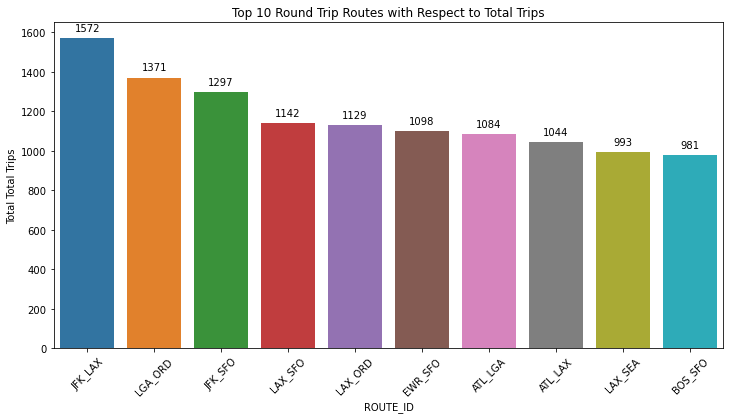

In [60]:
# Plotting the top ten routes in terms of total round trip
top_data = plot_top_routes(flights_tickets_airportcodes_final, num_bars=10, indicator='sum_ROUNDTRIP', metric='Total Trips', return_dataframe=True)


In [61]:
top_data['ROUTE_ID'].unique()

array(['JFK_LAX', 'LGA_ORD', 'JFK_SFO', 'LAX_SFO', 'LAX_ORD', 'EWR_SFO',
       'ATL_LGA', 'ATL_LAX', 'LAX_SEA', 'BOS_SFO'], dtype=object)


- **The top ten busiest round trip routes in terms of the number of trip are:** <br> 'JFK_LAX', 'LGA_ORD', 'JFK_SFO', 'LAX_SFO', 'LAX_ORD', 'EWR_SFO', 'ATL_LGA', 'ATL_LAX', 'LAX_SEA', and 'BOS_SFO'

<br>
<br>


2. **The 10 most profitable round trip routes without considering the upfront airplane cost in the quarter:**
- **PROFIT** = REVENUE - COST
<br>
- **REVENUE** = 200 * OCCUPANCY_RATE * (sum_ITIN_FARE/sum_PASSENGERS) + (35+70) * 0.5 * OCCUPANCY_RATE
    - Explanation: 
        - 200 * OCCUPANCY_RATE is the number of passenger per round trip
        - sum_ITIN_FARE/sum_PASSENGERS is the average fare per passenger
        - (35+70) * 0.5 * OCCUPANCY_RATE is the revenue from baggages and legs
<br>
- **COST** = 2 * (8 + 1.18) * DISTANCE + 5000 * (DEP_medium_dum + ARR_medium_dum) + 10000 * (DEP_large_dum + ARR_large_dum) + 75 * (DEP_DELAY_toPAY + ARR_DELAY_toPAY)
    - Explanation:
        - 2 * (8 + 1.18) * DISTANCE is the total cost fo fuel, oil, maintenance, insurance, depreciation, etc. The 2 at the front is because of the going and coming between the two airports
        - 5000 * (DEP_medium_dum + ARR_medium_dum) + 10000 * (DEP_large_dum + ARR_large_dum) is the total cost for operational. I created four dummies in a such way that the airline will pay according to whether the origin and destination are medium or large.
        - 75 * (DEP_DELAY_toPAY + ARR_DELAY_toPAY) is the cost for delay. I created a function calculate_delay_to_pay to compute the minutes delay to pay at the departure and the origin using the DEP_DELAY and ARR_DELAY variables.
- **Next I will aggregate the profit at ROUTE_ID level to determine the ten most profitable routes**
- Total round trip flights for the top profitable routes
- Summary values of other key components 
    - Because the company's motto is "on time for you", we have to look closely to the delay per ROUTE_ID

In [62]:
flights_tickets_airportcodes_final.columns

Index(['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DESTINATION', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED',
       'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE', 'TYPE_ORIG', 'NAME_ORIG',
       'ELEVATION_FT_ORIG', 'CONTINENT_ORIG', 'ISO_COUNTRY_ORIG',
       'MUNICIPALITY_ORIG', 'IATA_CODE_ORIG', 'COORDINATES_ORIG',
       'LATITUDE_ORIG', 'LONGITUDE_ORIG', 'TYPE_DEST', 'NAME_DEST',
       'ELEVATION_FT_DEST', 'CONTINENT_DEST', 'ISO_COUNTRY_DEST',
       'MUNICIPALITY_DEST', 'IATA_CODE_DEST', 'COORDINATES_DEST',
       'LATITUDE_DEST', 'LONGITUDE_DEST', 'ROUTE_ID', 'sum_ROUNDTRIP',
       'sum_PASSENGERS', 'mean_PASSENGERS', 'sum_ITIN_FARE', 'mean_ITIN_FARE'],
      dtype='object')

In [63]:
# flights_tickets_airportcodes_final = calculate_DELAY_metrics(flights_tickets_airportcodes_final, delay_columns=['DEP_DELAY', 'ARR_DELAY'])


In [64]:
flights_tickets_airportcodes_final.columns

Index(['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DESTINATION', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED',
       'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE', 'TYPE_ORIG', 'NAME_ORIG',
       'ELEVATION_FT_ORIG', 'CONTINENT_ORIG', 'ISO_COUNTRY_ORIG',
       'MUNICIPALITY_ORIG', 'IATA_CODE_ORIG', 'COORDINATES_ORIG',
       'LATITUDE_ORIG', 'LONGITUDE_ORIG', 'TYPE_DEST', 'NAME_DEST',
       'ELEVATION_FT_DEST', 'CONTINENT_DEST', 'ISO_COUNTRY_DEST',
       'MUNICIPALITY_DEST', 'IATA_CODE_DEST', 'COORDINATES_DEST',
       'LATITUDE_DEST', 'LONGITUDE_DEST', 'ROUTE_ID', 'sum_ROUNDTRIP',
       'sum_PASSENGERS', 'mean_PASSENGERS', 'sum_ITIN_FARE', 'mean_ITIN_FARE'],
      dtype='object')

In [65]:

# Calculating DEP_DELAY_toPAY:
delay_column='DEP_DELAY'
flights_tickets_airportcodes_final = calculate_delay_to_pay(flights_tickets_airportcodes_final, delay_column)

# Calculating ARR_DELAY_toPAY:
delay_column='ARR_DELAY'
flights_tickets_airportcodes_final = calculate_delay_to_pay(flights_tickets_airportcodes_final, delay_column)

# Calculating the total DELAY to pay per route and per type of airport
flights_tickets_airportcodes_final = calculate_total_DELAY_toPAY(flights_tickets_airportcodes_final)


In [66]:
flights_tickets_airportcodes_final.columns

Index(['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DESTINATION', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED',
       'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE', 'TYPE_ORIG', 'NAME_ORIG',
       'ELEVATION_FT_ORIG', 'CONTINENT_ORIG', 'ISO_COUNTRY_ORIG',
       'MUNICIPALITY_ORIG', 'IATA_CODE_ORIG', 'COORDINATES_ORIG',
       'LATITUDE_ORIG', 'LONGITUDE_ORIG', 'TYPE_DEST', 'NAME_DEST',
       'ELEVATION_FT_DEST', 'CONTINENT_DEST', 'ISO_COUNTRY_DEST',
       'MUNICIPALITY_DEST', 'IATA_CODE_DEST', 'COORDINATES_DEST',
       'LATITUDE_DEST', 'LONGITUDE_DEST', 'ROUTE_ID', 'sum_ROUNDTRIP',
       'sum_PASSENGERS', 'mean_PASSENGERS', 'sum_ITIN_FARE', 'mean_ITIN_FARE',
       'DEP_DELAY_toPAY', 'ARR_DELAY_toPAY', 'sum_DEP_DELAY_toPAY',
       'sum_ARR_DELAY_toPAY'],
      dtype='object')

In [67]:

# Calculating total departure, arrival, and overall total delay per route
flights_tickets_airportcodes_final = add_delay_columns(flights_tickets_airportcodes_final)

In [68]:

# Checking the data again
# flights_tickets_airportcodes_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819692 entries, 0 to 1819691
Data columns (total 49 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   TAIL_NUM             object 
 3   OP_CARRIER_FL_NUM    object 
 4   ORIGIN_AIRPORT_ID    int64  
 5   ORIGIN               object 
 6   ORIGIN_CITY_NAME     object 
 7   DEST_AIRPORT_ID      int64  
 8   DESTINATION          object 
 9   DEST_CITY_NAME       object 
 10  DEP_DELAY            float64
 11  ARR_DELAY            float64
 12  CANCELLED            float64
 13  AIR_TIME             float64
 14  DISTANCE             float64
 15  OCCUPANCY_RATE       float64
 16  TYPE_ORIG            object 
 17  NAME_ORIG            object 
 18  ELEVATION_FT_ORIG    float64
 19  CONTINENT_ORIG       object 
 20  ISO_COUNTRY_ORIG     object 
 21  MUNICIPALITY_ORIG    object 
 22  IATA_CODE_ORIG       object 
 23  COORDINATES_ORIG     object 
 24

In [69]:
# Creating the origin and destination dummies for medium and large airports
flights_tickets_airportcodes_final = create_dummies(flights_tickets_airportcodes_final)

In [70]:

# Creating Cost, Revenue, and Profit
flights_tickets_airportcodes_final = profit(flights_tickets_airportcodes_final)


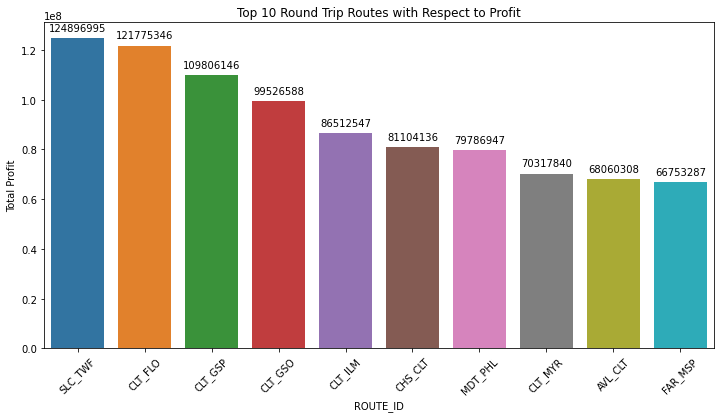

In [71]:
top_data = plot_top_routes(flights_tickets_airportcodes_final, num_bars=10, indicator='sum_PROFIT', metric='Profit', return_dataframe=True)

In [72]:
top_data[['ROUTE_ID', 'sum_ROUNDTRIP', 'sum_PROFIT']].head(10)

,ROUTE_ID,sum_ROUNDTRIP,sum_PROFIT
1542216,SLC_TWF,13.0,1.248970e+08
1386956,CLT_FLO,1.0,1.217753e+08
1330023,CLT_GSP,3.0,1.098061e+08
1359196,CLT_GSO,1.0,9.952659e+07
1372284,CLT_ILM,13.0,8.651255e+07
1326358,CHS_CLT,16.0,8.110414e+07
1302948,MDT_PHL,1.0,7.978695e+07
1378330,CLT_MYR,6.0,7.031784e+07
1367730,AVL_CLT,1.0,6.806031e+07
670521,FAR_MSP,30.0,6.675329e+07


### Conclusion:
- **The top ten profitable routes in terms of total profit are:** <br> 'SLC_TWF', 'CLT_FLO', 'CLT_GSP', 'CLT_GSO', 'CLT_ILM', 'CHS_CLT','MDT_PHL', 'CLT_MYR', 'AVL_CLT', 'FAR_MSP'
- **Their respective total round trips are:** <br>  1572, 1371, 1297, 1142, 1129, 1098, 1084, 1044, 993, and 981
- **Their respective profit in $ are:** <br>  they are on the bar graph above

### Summary values of other key components
- Because punctuality is a big part of the company's brand image, it is important to pay a close attention to delay per route. It will help to balance between profit and reputaion. If a route has a reputaion of delaying airplane, then maybe it will be good to avoid that route all together. This have three sub-components: 
    - total depay per route 
    - total departure delay per rooute 
    - total arrival delay per route
- I've anticipated on that by adding sum_DEP_DELAY_toPAY and sum_ARR_DELAY_toPAY

In [73]:
# Creating the breakeven metric in the data
flights_tickets_airportcodes_final['num_Breakeven_Trip'] = (90000000 / flights_tickets_airportcodes_final['mean_PROFIT']).round().astype(int)

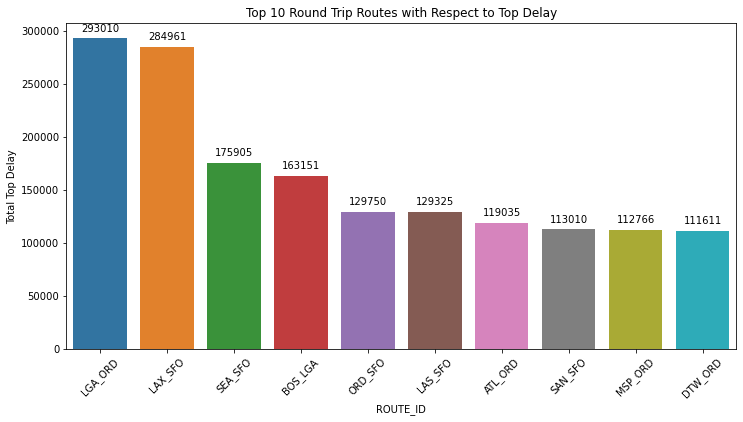

In [74]:
# Plotting the most delayed routes
top_data = plot_top_routes(flights_tickets_airportcodes_final, num_bars=10, indicator='sum_DELAY', metric='Top Delay', return_dataframe=True)

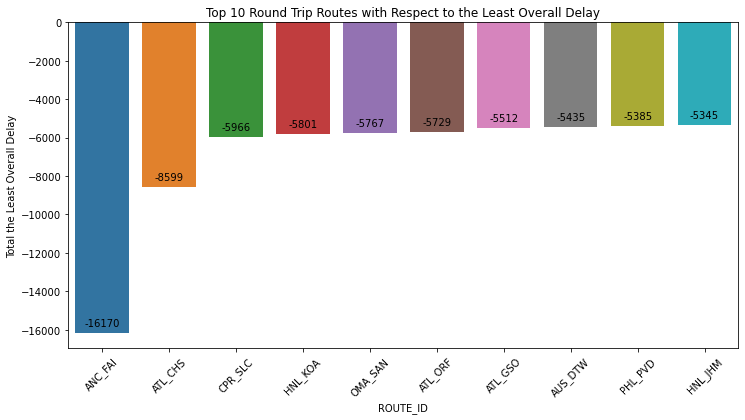

In [75]:

# Plotting the top least delayed routes writh respect to overall delay
top_data_delay = plot_top_least_delayed_routes(flights_tickets_airportcodes_final, num_bars=10, indicator='sum_DELAY', metric='the Least Overall Delay', return_dataframe=True)

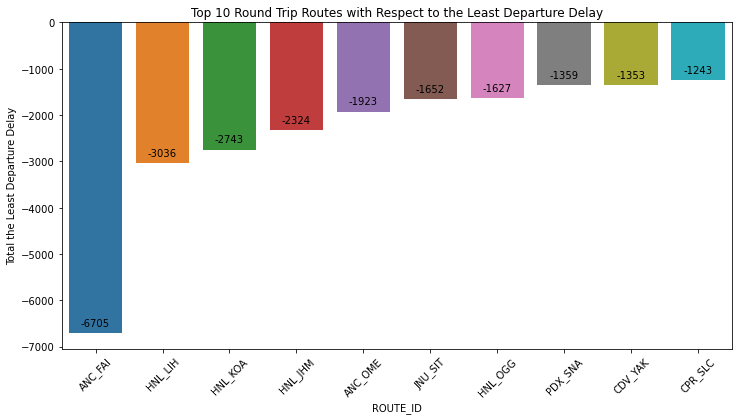

In [76]:

# Plotting the top least delayed routes writh respect to overall delay
top_data_delay = plot_top_least_delayed_routes(flights_tickets_airportcodes_final, num_bars=10, indicator='sum_DEP_DELAY', metric='the Least Departure Delay', return_dataframe=True)

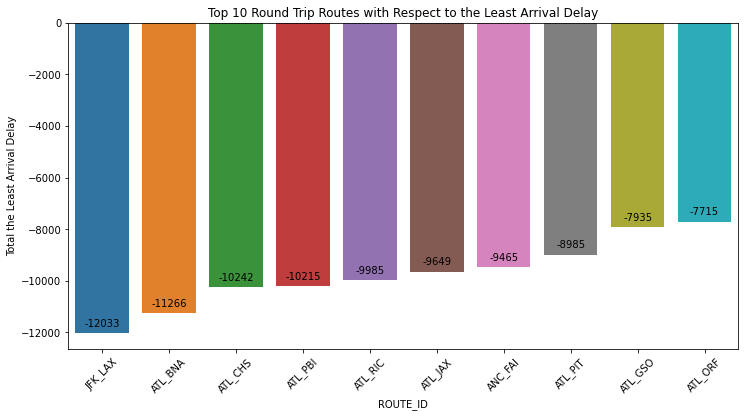

In [77]:

# Plotting the top least delayed routes writh respect to overall delay
top_data_delay = plot_top_least_delayed_routes(flights_tickets_airportcodes_final, num_bars=10, indicator='sum_ARR_DELAY', metric='the Least Arrival Delay', return_dataframe=True)

In [78]:
# Summary Statistics of all the keep component 
flights_tickets_airportcodes_final[['sum_ROUNDTRIP', 'sum_PROFIT','sum_DEP_DELAY', 'sum_ARR_DELAY', 'sum_DELAY']].describe()

,sum_ROUNDTRIP,sum_PROFIT,sum_DEP_DELAY,sum_ARR_DELAY,sum_DELAY
count,1.819692e+06,1.819692e+06,1.819692e+06,1.819692e+06,1.819692e+06
mean,2.929639e+02,-1.525623e+07,1.643349e+04,9.250983e+03,2.568448e+04
std,2.688329e+02,3.671646e+07,1.981276e+04,1.708479e+04,3.629509e+04
min,1.000000e+00,-2.102041e+08,-6.705000e+03,-1.203300e+04,-1.617000e+04
25%,8.500000e+01,-3.092287e+07,5.001000e+03,5.210000e+02,5.689000e+03
50%,2.210000e+02,-7.876798e+06,1.015500e+04,4.097000e+03,1.390700e+04
75%,4.190000e+02,4.937162e+06,2.140400e+04,1.218800e+04,3.277900e+04
max,1.572000e+03,1.248970e+08,1.540990e+05,1.403220e+05,2.930100e+05


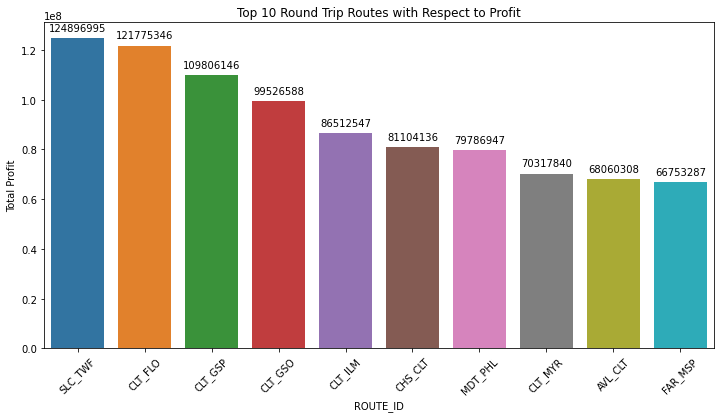

In [79]:
top_data_profit = plot_top_routes(flights_tickets_airportcodes_final, num_bars=10, indicator='sum_PROFIT', metric='Profit', return_dataframe=True)

In [80]:

# Sorting the the top 10 most profitable routes with respect to the overall delay
top_data_profit[['ROUTE_ID','sum_ROUNDTRIP', 'sum_PROFIT','sum_DEP_DELAY', 'sum_ARR_DELAY', 'sum_DELAY']].sort_values(by='sum_DELAY', ascending=True).head(10)



,ROUTE_ID,sum_ROUNDTRIP,sum_PROFIT,sum_DEP_DELAY,sum_ARR_DELAY,sum_DELAY
1378330,CLT_MYR,6.0,7.031784e+07,4719.0,-3073.0,1646.0
1386956,CLT_FLO,1.0,1.217753e+08,2230.0,663.0,2893.0
1542216,SLC_TWF,13.0,1.248970e+08,3839.0,637.0,4476.0
1372284,CLT_ILM,13.0,8.651255e+07,6607.0,-607.0,6000.0
1302948,MDT_PHL,1.0,7.978695e+07,2864.0,3136.0,6000.0
1359196,CLT_GSO,1.0,9.952659e+07,8149.0,-1792.0,6357.0
1367730,AVL_CLT,1.0,6.806031e+07,6107.0,1696.0,7803.0
1330023,CLT_GSP,3.0,1.098061e+08,10909.0,-99.0,10810.0
1326358,CHS_CLT,16.0,8.110414e+07,9878.0,4805.0,14683.0
670521,FAR_MSP,30.0,6.675329e+07,20841.0,16124.0,36965.0


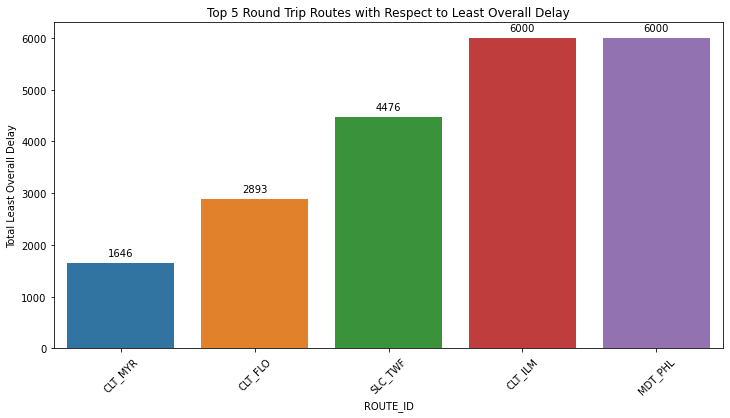

In [81]:

# Plotting the top least delayed routes writh respect to overall delay
top_data_delay5 = plot_top_least_delayed_routes(top_data_profit, num_bars=5, indicator='sum_DELAY', metric='Least Overall Delay', return_dataframe=True)


## The 5 routes I recommend:
- I recommend the 5 least delayed routes among the top most profitable routes.
- These routes are : CLT_MYR, CLT_FLO, SLC_TWF, CLT_ILM, and MDT_PHL
- This way, the company will balance between profit and its reputation which is being on time, and therefore avoinding delays
- One could also use delay at departure and arrival. 

<br>
<br>
<br>
<br>
<br>
<br>

4. **The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend:**
- Let's compute the average profit per round trip first

In [82]:

# top_data_profit['num_Breakeven_Trip'] = (90000000 / top_data_profit['mean_PROFIT']).round().astype(int)

In [83]:
flights_tickets_airportcodes_final[['ROUTE_ID','sum_ROUNDTRIP', 'sum_PROFIT','sum_DEP_DELAY', 'sum_ARR_DELAY', 'sum_DELAY', 'num_Breakeven_Trip']].describe()

,sum_ROUNDTRIP,sum_PROFIT,sum_DEP_DELAY,sum_ARR_DELAY,sum_DELAY,num_Breakeven_Trip
count,1.819692e+06,1.819692e+06,1.819692e+06,1.819692e+06,1.819692e+06,1.819692e+06
mean,2.929639e+02,-1.525623e+07,1.643349e+04,9.250983e+03,2.568448e+04,-9.747475e+03
std,2.688329e+02,3.671646e+07,1.981276e+04,1.708479e+04,3.629509e+04,2.818348e+05
min,1.000000e+00,-2.102041e+08,-6.705000e+03,-1.203300e+04,-1.617000e+04,-1.182363e+07
25%,8.500000e+01,-3.092287e+07,5.001000e+03,5.210000e+02,5.689000e+03,-6.341000e+03
50%,2.210000e+02,-7.876798e+06,1.015500e+04,4.097000e+03,1.390700e+04,-3.846000e+03
75%,4.190000e+02,4.937162e+06,2.140400e+04,1.218800e+04,3.277900e+04,3.604000e+03
max,1.572000e+03,1.248970e+08,1.540990e+05,1.403220e+05,2.930100e+05,3.090016e+06


In [84]:

# Sorting the the top 10 most profitable routes with respect to the overall delay
top_data_profit[['ROUTE_ID','sum_ROUNDTRIP', 'sum_PROFIT','sum_DEP_DELAY', 'sum_ARR_DELAY', 'sum_DELAY', 'num_Breakeven_Trip']].sort_values(by='sum_DELAY', ascending=True).head(10)



,ROUTE_ID,sum_ROUNDTRIP,sum_PROFIT,sum_DEP_DELAY,sum_ARR_DELAY,sum_DELAY,num_Breakeven_Trip
1378330,CLT_MYR,6.0,7.031784e+07,4719.0,-3073.0,1646.0,1733
1386956,CLT_FLO,1.0,1.217753e+08,2230.0,663.0,2893.0,372
1542216,SLC_TWF,13.0,1.248970e+08,3839.0,637.0,4476.0,419
1372284,CLT_ILM,13.0,8.651255e+07,6607.0,-607.0,6000.0,1524
1302948,MDT_PHL,1.0,7.978695e+07,2864.0,3136.0,6000.0,896
1359196,CLT_GSO,1.0,9.952659e+07,8149.0,-1792.0,6357.0,1345
1367730,AVL_CLT,1.0,6.806031e+07,6107.0,1696.0,7803.0,1484
1330023,CLT_GSP,3.0,1.098061e+08,10909.0,-99.0,10810.0,1268
1326358,CHS_CLT,16.0,8.110414e+07,9878.0,4805.0,14683.0,1741
670521,FAR_MSP,30.0,6.675329e+07,20841.0,16124.0,36965.0,1381



- It will take 1733, 372, 419, 1524, and 896 to beakeven for CLT_MYR, CLT_FLO, SLC_TWF, CLT_ILM, and MDT_PHL respectively
- Those are my recommended 5 routes as I explained above

<br>
<br>
<br>
<br>
<br>
<br>

5. **Key Performance Indicators (KPI’s) that I recommend tracking in the future to measure the success of my 5 recommended routes above:**
- I recommend to pay a close attention to the delay metrics at the departure, arrival, and overall. 

In [86]:
# Checking the data again
# flights_tickets_airportcodes_final.info()

<br>
<br>
<br>
<br>
<br>
<br>

# Conclusion
- So far, we mostly used the totals per route (like sum_ROUNDTRIP, sum_PROFIT, sum_DEP_DELAY, sum_ARR_DELAY, sum_DELAY) for our performance analysis
- But I suggest considering the means and medians within ROUTE_ID to further our analysis 
- The reason is that the median, for example, is less sensitive to outliers. 
- As I described above, the datasets (flights, tickets, airport_codes) have limitations even though they are of fair good quality
- All the variables have the expected values, even though some had the wrong format. I fixed them.
- The main limitation is not being able to connect each ticket to its flight
- If I had more time, I would talk more with airline experts to improve my knowledge of how to approach the data.